#Library imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from numpy import array
import os


from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration


In [0]:
img = Image.open("/content/drive/My Drive/noise_images/blur_191.jpg")
psf = np.ones((5, 5)) / 25
arr = array(img)

img2 = color.rgb2gray(arr)
orig=conv2(img2, psf, 'same')


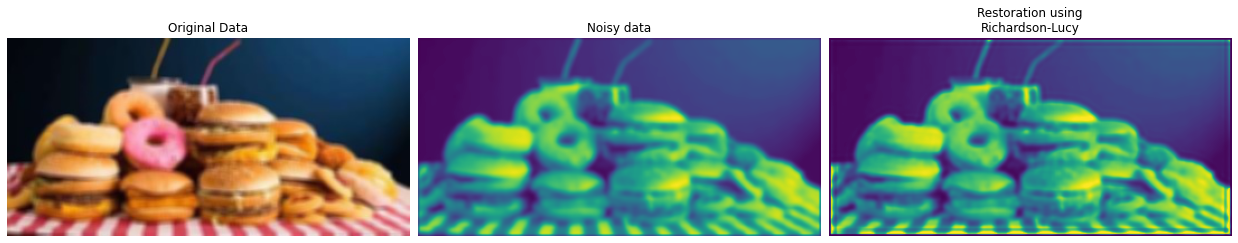

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d as conv2
%matplotlib inline
from skimage import color, data, restoration

img = Image.open("/content/drive/My Drive/noise_images/blur_191.jpg")
#psf = np.ones((5, 5)) / 25
arr = array(img)

#img2 = color.rgb2gray(arr)
#orig=conv2(img, psf, 'same')

#orig2=color.gray2rgb(orig)
img_noisy1 = Image.open("/content/drive/My Drive/noise_images/blur_191.jpg")
psf = np.ones((5, 5)) / 25
arr = array(img_noisy1)

img_noisy2 = color.rgb2gray(arr)
img_noisy=conv2(img_noisy2, psf, 'same')

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(img_noisy, psf, iterations=10)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 13))
#plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(arr)
ax[0].set_title('Original Data')

ax[1].imshow(img_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=img_noisy.min(), vmax=img_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()


In [0]:
im= Image.fromarray(deconvolved_RL,'RGB')
im.show()